# Deriving expected moment dynamics
$$
\def\n{\mathbf{n}}
\def\x{\mathbf{x}}
\def\N{\mathbb{\mathbb{N}}}
\def\X{\mathbb{X}}
\def\NX{\mathbb{\N_0^\X}}
\def\C{\mathcal{C}}
\def\Jc{\mathcal{J}_c}
\def\DM{\Delta M_{c,j}}
\newcommand\diff{\mathop{}\!\mathrm{d}}
\def\Xc{\mathbf{X}_c}
\def\Yc{\mathbf{Y}_c}
\newcommand{\muset}[1]{\dot{\{}#1\dot{\}}}
$$

In [1]:
# initialize sympy printing (for latex output)
from sympy import init_printing
init_printing()

# import functions and classes for compartment models
from compartor import *

## Specifying the reaction network

As in the previous HOWTO, first specify a reaction network.
We use again the nested birth-death process example.

In [2]:
from nested_birth_death import D, transitions
display_transition_classes(transitions)

Display.__str__: TODO

## Deriving expected moment dynamics

Next we specify the moments we want to derive, for example, $N$, $N^2$, $M^1$, and $(M^1)^2$.

To denote a particular moment, use the `Moment` class. It takes as constructor arguments the integer exponents in each species.

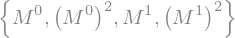

In [3]:
moments = {
    Moment(0),
    Moment(0)**2,
    Moment(1),
    Moment(1)**2
}
display(moments)

Then call the function `compute_moment_equations()`, giving the reaction network, the desired moment expressions, and the number of species.

In [4]:
(equations, missing) = compute_moment_equations(transitions, moments, D)

The result is a pair `(equations, missing)`.

`equations` are the expressions for the expectation of the desired moment expressions.
`equations` is a list of pairs `(fM, dfMdt)`, where each pair consists of the desired moment expression, and the derived expression for its derivative by $t$.

`missing` is a set of moment expressions that are reuired in the derivatives, but are not known yet (not listed in desired `moments`).

To display the derived equations, use the `display_moment_equations()` function.

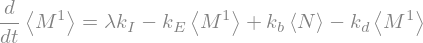

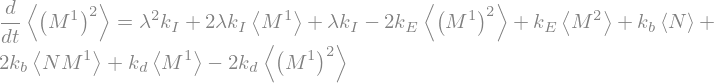

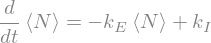

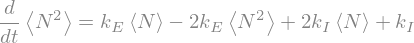

In [5]:
display_moment_equations(equations)

The missing moment expressions occuring in these equations are `missing`.

In [6]:
missing

Now, we can iterate the process to also get these moments.

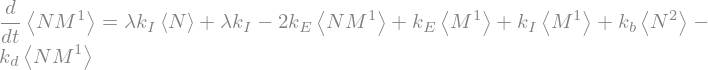

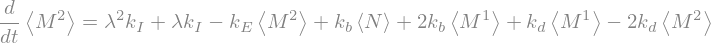

In [7]:
(equations2, missing2) = compute_moment_equations(transitions, missing, D, provided=moments)
display_moment_equations(equations2)

In this example, the system is closed, as there are no more missing moment expressions.

In [8]:
missing2

Otherwise, the above process can be iterated until convergence or up to the desired order of moments (and applying a moment closure).